## Using Tensorflow

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

%matplotlib inline

In [6]:
#Set seed values
np.random.seed(444)
tf.random.set_seed(444)

In [7]:
r = 3

In [8]:
file_path = 'DATA3.csv'
df = pd.read_csv(file_path)
df.head()

,x,y,label
0,-0.250257,-3.923704,0
1,1.278009,-4.766572,0
2,4.885855,4.110439,0
3,-1.284047,3.551753,0
4,3.304227,4.859632,0


### Data Exploration

In [9]:
df.describe()

,x,y,label
count,256.000000,256.000000,256.000000
mean,-0.002646,0.021606,0.242188
std,3.033376,2.899741,0.429246
min,-4.947726,-4.967063,0.000000
25%,-2.655781,-2.548067,0.000000
50%,-0.000570,-0.010260,0.000000
75%,2.704488,2.665835,0.000000
max,4.971048,4.956871,1.000000


In [10]:
#Defining the number of rows
num_rows = df.shape[0]
num_rows

256

In [11]:
x_feed = df['x'].values
y_feed = df['y'].values
label = df['label'].values
x_feed.shape

(256,)

In [12]:
#Reshaping into 2D arrays
x_feed = np.reshape(x_feed, (num_rows, 1))
y_feed = np.reshape(y_feed, (num_rows, 1))
label = np.reshape(label, (num_rows, 1))

In [13]:
inp = np.concatenate([x_feed, y_feed], axis=1)
inp.shape

(256, 2)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(inp, label, test_size=0.3, random_state=444)

In [15]:
x_train.shape

(179, 2)

In [16]:
x_test.shape

(77, 2)

In [17]:
#generating data for circles
cx = np.linspace(start=-r, stop=r)
c1 = np.sqrt(r**2-cx**2)
c2 = -np.sqrt(r**2-cx**2)

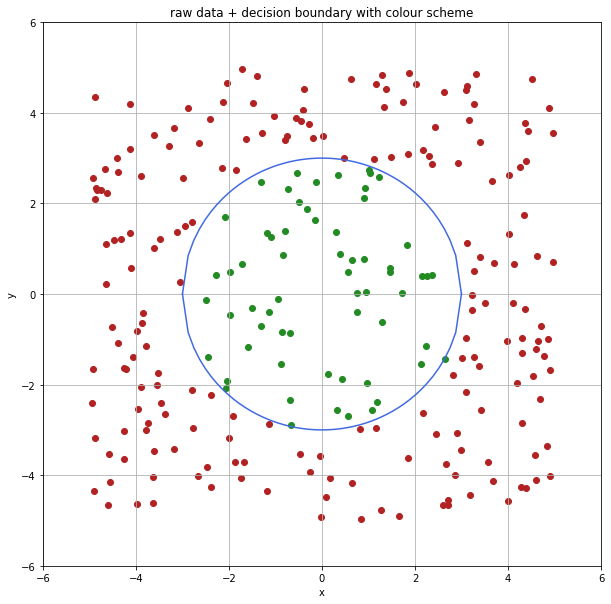

In [18]:
#Plotting data
plt.figure(figsize=(10, 10))
plt.plot(cx, c1, c='royalblue')
plt.plot(cx, c2, c='royalblue')
plt.grid()
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.title('raw data + decision boundary with colour scheme')
plt.xlabel('x')
plt.ylabel('y')

for i in range(num_rows):
    
    if label[i] == 1:
        plt.scatter(x_feed[i], y_feed[i], c='forestgreen')
    else:
        plt.scatter(x_feed[i], y_feed[i], c='firebrick')

### Neural Network Model

In [19]:
#Creating a model object
model = Sequential()

#Creating an input layer
model.add(Input(shape=(2, )))

#Adding hidden layer
model.add(Dense(units=4, activation='tanh'))

#Adding output layer
model.add(Dense(units=1, activation='sigmoid'))

In [20]:
log_dir = "./logs/"
tensorboard_callback = TensorBoard(log_dir, histogram_freq=1)

In [21]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(x=x_train, y=y_train, 
          epochs=3,
          verbose=2,
          callbacks = [tensorboard_callback],
          validation_data=(x_test, y_test))

Epoch 1/3
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
6/6 - 0s - loss: 0.9207 - accuracy: 0.4860 - val_loss: 0.9183 - val_accuracy: 0.4805
Epoch 2/3
6/6 - 0s - loss: 0.8949 - accuracy: 0.4804 - val_loss: 0.8961 - val_accuracy: 0.4805
Epoch 3/3
6/6 - 0s - loss: 0.8706 - accuracy: 0.4804 - val_loss: 0.8748 - val_accuracy: 0.4675


<AxesSubplot:>

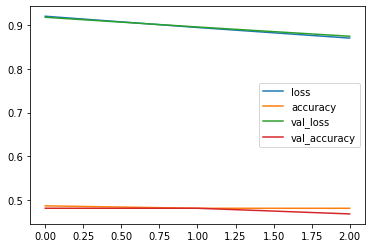

In [24]:
#Plotting losses
losses = pd.DataFrame(model.history.history)
losses.plot()

In [25]:
#Make model prediction
label_pred = model.predict(inp)
print(label_pred)

[[0.15301245]
 [0.14978611]
 [0.31630868]
 [0.82698107]
 [0.68144244]
 [0.81757617]
 [0.82127154]
 [0.24969971]
 [0.17001498]
 [0.2306543 ]
 [0.5958801 ]
 [0.16486838]
 [0.83328855]
 [0.726135  ]
 [0.17650706]
 [0.7855234 ]
 [0.7305417 ]
 [0.82391655]
 [0.42979264]
 [0.52560043]
 [0.1543957 ]
 [0.7153086 ]
 [0.15978569]
 [0.41200107]
 [0.80945766]
 [0.15714827]
 [0.20553854]
 [0.28289735]
 [0.71501863]
 [0.66333646]
 [0.17718858]
 [0.81539094]
 [0.8280522 ]
 [0.72270215]
 [0.8352692 ]
 [0.15610668]
 [0.82823765]
 [0.28216588]
 [0.17138833]
 [0.26279148]
 [0.74330175]
 [0.6692757 ]
 [0.19778848]
 [0.2837705 ]
 [0.52216446]
 [0.21880302]
 [0.8074656 ]
 [0.14959058]
 [0.6957684 ]
 [0.39819568]
 [0.6869397 ]
 [0.16290429]
 [0.51495904]
 [0.64690447]
 [0.2545528 ]
 [0.2321555 ]
 [0.319232  ]
 [0.20646212]
 [0.7706926 ]
 [0.6923393 ]
 [0.27957773]
 [0.80538714]
 [0.1796143 ]
 [0.34558454]
 [0.83575755]
 [0.7432518 ]
 [0.77052474]
 [0.6645795 ]
 [0.835307  ]
 [0.73948133]
 [0.14829448]
 [0.28

In [26]:
#Defining threshold
threshold = 0.5

In [27]:
#Extracting weights of the hidden layer
W1 = model.weights[0].numpy()
b1 = model.weights[1].numpy()
W1

array([[ 0.36684212,  0.06165121, -0.9324637 ,  0.17086054],
       [-0.56327975, -0.54389894,  0.6776191 ,  0.44070873]],
      dtype=float32)

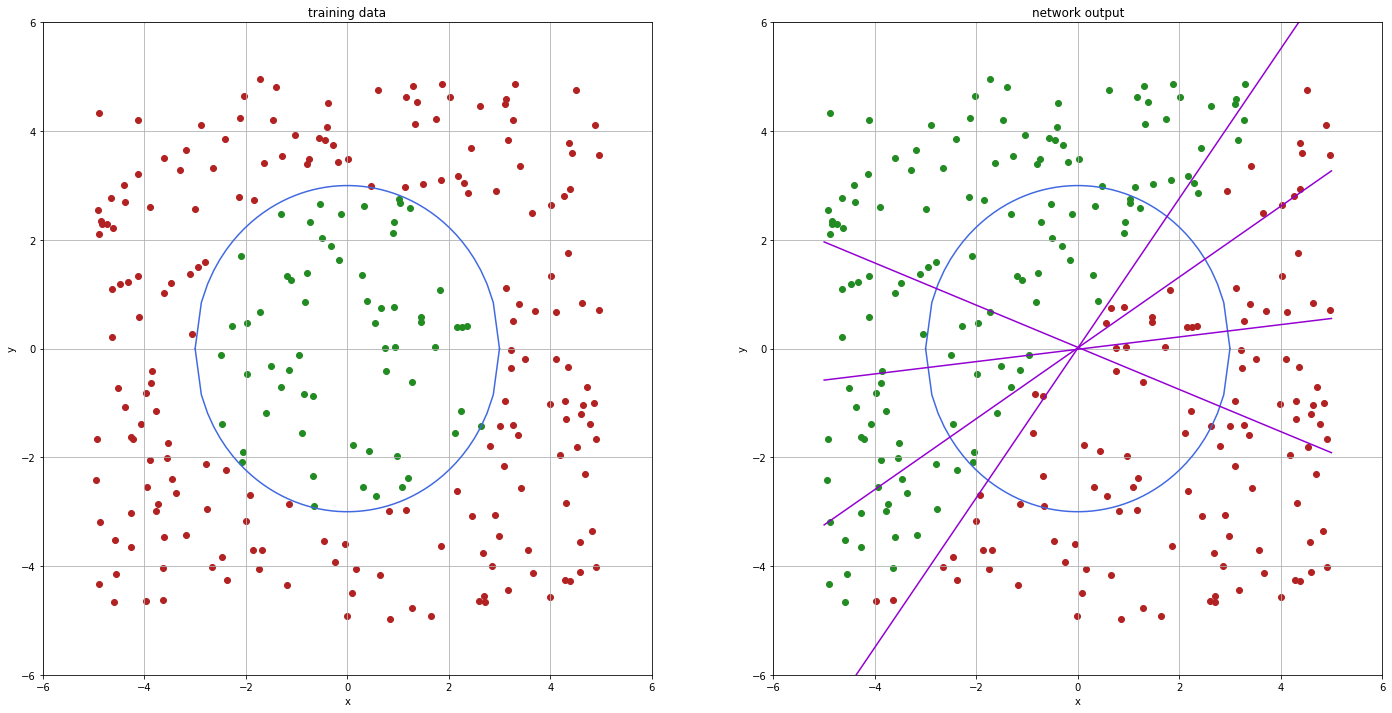

In [28]:
#Defining figure and axes objects
fig = plt.figure(figsize=(24, 12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#Plotting data with labels
ax1.plot(cx, c1, c='royalblue')
ax1.plot(cx, c2, c='royalblue')
ax1.grid()
ax1.set_xlim(-6, 6)
ax1.set_ylim(-6, 6)
ax1.set_title('training data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

#Looping through the data points
for i in range(num_rows):
    
    if label[i] == 1:
        ax1.scatter(x_feed[i], y_feed[i], c='forestgreen')
    else:
        ax1.scatter(x_feed[i], y_feed[i], c='firebrick')
        
        
ax2.grid()
ax2.set_xlim(-6, 6)
ax2.set_ylim(-6, 6)
ax2.set_title('network output')
ax2.plot(cx, c1, c='royalblue')
ax2.plot(cx, c2, c='royalblue')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

for i in range(num_rows):
    
    if label_pred[i, 0] >= threshold:
        ax2.scatter(x_feed[i], y_feed[i], c='forestgreen')
    else:
        ax2.scatter(x_feed[i], y_feed[i], c='firebrick')
        
#Defining the x-coordinate for decision boundary
lx = np.linspace(-5, 5)

#Plotting the training decision boundary
for i in range(W1.shape[1]):
    
    w1 = W1[0, i]
    w2 = W1[1, i]
    
    b = b1[i]
    
    l = (-w1/w2)*lx - b/w2
    
    ax2.plot(lx, l, c='darkviolet')